# Pure Python Neural Network

A simple dense neural network using only Python and NumPy.

Single-sample SGD for training.

In [162]:
import numpy as np
from graphviz import Digraph

class Layer:
    def __init__(self):
        pass

    
class NeuralNetwork:
    def __init__(self):
        self.layers = []
        
    def add_input_layer(self, num_neurons):
        layer = Layer()
        layer.num_neurons = num_neurons
        layer.w = None
        layer.dw = None
        layer.dell = None
        layer.a = np.zeros((num_neurons+1,))
        layer.a[0] = 1.0
        self.layers.append(layer)
            
    def add_dense_layer(self, num_neurons):
        layer = Layer()
        layer.num_neurons = num_neurons
        prev_layer_num_neurons = self.layers[-1].num_neurons
        layer.w = 2*np.random.rand(num_neurons+1, prev_layer_num_neurons+1)-1.0
        layer.w[0,:] = 0
        layer.dw = np.zeros((num_neurons, prev_layer_num_neurons+1))
        layer.dell = np.zeros((num_neurons+1,))
        layer.s = np.zeros((num_neurons+1,))
        layer.s[0] = 1.0
        layer.a = np.zeros((num_neurons+1,))
        layer.a[0] = 1
        self.layers.append(layer)
    
    def graphviz(self):
        dot = Digraph(engine="neato")
        L = len(self.layers) - 1
        for l in range(0, L+1):
            # Nodes
            for j in range(self.layers[l].num_neurons+1):
                dot.node("x({})[{}]".format(l, j), pos="{},{}!".format(j,-2*l))
                # Forward edges
                if l < L:
                    for i in range(1, self.layers[l+1].num_neurons+1):
                        dot.edge("x({})[{}]".format(l, j), "x({})[{}]".format(l+1, i), arrowhead="none")
                
        display(dot)
        
    def theta(self, s):
        return np.tanh(s)
    
    def theta_derivative(self, s):
        return 1 - np.tanh(s)**2
        
    def predict(self, x):
        self.layers[0].a = x
        
        self.layers[1].s = self.layers[1].w @ self.layers[0].a
        self.layers[1].a = self.theta(self.layers[1].s)
        self.layers[1].a[0] = 1.0
        
        self.layers[2].s = self.layers[2].w @ self.layers[1].a
        self.layers[2].a = self.theta(self.layers[2].s)
        self.layers[2].a[0] = 1.0
        return self.layers[2].a[1]
    
    def error(self, y_actual):
        y_predicted = self.layers[-1].a[1]
        return (y_predicted - y_actual)**2
    
    def error_derivative(self, y_actual):
        y_predicted = self.layers[-1].a[1]
        return 2*(y_predicted - y_actual)**2 # Wrong, just to get same results as hand calculation
        #return 2*(y_predicted - y_actual) # 
    
    def backprop(self, x, y):
        self.predict(x)
        L = len(self.layers)-1
        
        # Special case for output layer
        s = self.layers[L].s[1]
        self.layers[L].dell[1] = self.error_derivative(y) * self.theta_derivative(s)
        print("dellF:", self.layers[L].dell[1])

        # Loop through output+hidden layers
        for l in range(L, 1, -1):
            # Compute dedw for this layer
            for i in range(0, self.layers[l-1].num_neurons+1):
                for j in range(self.layers[l].num_neurons+1):
                    self.layers[l-1].dell[i] += self.theta_derivative(self.layers[l-1].a[i]) \
                        * self.layers[l].w[j,i]\
                        * self.layers[l].dell[j]
                    


nn = NeuralNetwork()
nn.add_input_layer(2)


nn.add_dense_layer(2)
nn.layers[1].w[1,0] = -1
nn.layers[1].w[1,1] = 2
nn.layers[1].w[1,2] = 3
nn.layers[1].w[2,0] = -2
nn.layers[1].w[2,1] = 1
nn.layers[1].w[2,2] = 2

nn.add_dense_layer(1)
nn.layers[2].w[1,0] = 0
nn.layers[2].w[1,1] = 1
nn.layers[2].w[1,2] = 2


print(nn.predict(np.array([1, 1, 2])))
print(nn.error(0.5))
nn.backprop(np.array([1, 1, 2]), 0.5)

0.9949561903437636
0.24498163035961193
dellF: 0.004930098178115583


In [62]:
nn = NeuralNetwork()
nn.add_input_layer(2)
nn.add_dense_layer(2)
nn.add_dense_layer(1)
nn.predict(np.array([1, 2, 3]))

None


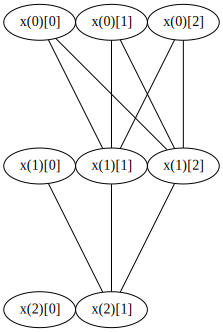

In [54]:
nn = NeuralNetwork()
nn.add_input_layer(2)
nn.add_dense_layer(2)
nn.add_dense_layer(1)
nn.graphviz()